In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2
from collections import deque


In [2]:
def yieldRandomNum():
    """
    Generate a random integer using a linear congruential generator (LCG)
    """
    seed = 12345  # Initial seed value
    a = 1103515245  # Multiplier (recommended values for LCG)
    c = 12345  # Increment
    m = 2**31  # Modulus (usually a large prime number or a power of 2)
    while True:
        seed = (a * seed + c) % m
        yield seed
        
gen = yieldRandomNum()
def generate_random_number(lower_bound = 0, upper_bound = 100):
    m = 2**31
    n = next(gen)
    
    # Scale and shift the random number to fit within the desired range
    scaled_number = lower_bound + (n / (m - 1)) * (upper_bound - lower_bound + 1)
    return int(scaled_number)
       

In [3]:
# Function to check imbalance in dataset
def check_imbalance(dataset_path):
    classes = os.listdir(dataset_path)
    num_images_per_class = {cls: len(os.listdir(os.path.join(dataset_path, cls))) for cls in classes}
    class_labels = list(num_images_per_class.keys())
    num_images = list(num_images_per_class.values())

    plt.bar(class_labels, num_images)
    plt.xlabel('Classes')
    plt.ylabel('Number of Images')
    plt.title('Number of Images per Class')
    plt.xticks(rotation=45)
    plt.show()

    min_images = min(num_images)
    max_images = max(num_images)
    if max_images > 2 * min_images:
        imbalanced_class = class_labels[num_images.index(max_images)]
        print(f"The dataset is imbalanced. The imbalanced class is {imbalanced_class}.")
        print("To balance the dataset, methods like data augmentation, oversampling, or undersampling can be used.")
    else:
        print("The dataset is balanced.")

In [4]:
def select_random_images(dataset_dir, num_images = 8):
    """
    Select random images from a list of image paths using a custom random number generator.
    
    Parameters:
        image_paths (list): List of paths to the images.
        num_images (int): Number of images to select.
    Returns:
        list: List of randomly selected image paths.
    """
    # Collect paths to all images in the dataset
    image_paths = []
    for root, dirs, files in os.walk(dataset_dir):
        for file in files:
            if file.endswith(('.jpg', '.jpeg', '.png')):
                image_paths.append(os.path.join(root, file))
    selected_images = deque()

    # Generate random indices using LCG
    indices = deque()
    for _ in range(num_images):
        random_index = generate_random_number(0, len(image_paths) - 1)
        indices.append(random_index)
        seed = random_index  # Update seed for the next iteration
    
    # Select images corresponding to random indices
    for index in indices:
        selected_images.append(image_paths[index])
    
    return selected_images

In [5]:


# Function to convert images to grayscale and plot histograms
def plot_histograms(dataset_path, num_samples=8):
    classes = os.listdir(dataset_path)
    sampled_images = select_random_images(dataset_path)

    for image_path in sampled_images:
        image = cv2.imread(image_path)
        if len(image.shape) > 2:
            gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        else:
            gray_image = image
        plt.figure(figsize=(10, 5))

        plt.subplot(1, 2, 1)
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        plt.title('Original Image')

        plt.subplot(1, 2, 2)
        plt.hist(gray_image.ravel(), 256, [0, 256])
        plt.title('Histogram')

        plt.show()

In [6]:

# Function to perform transformations on images and plot before and after images
def plot_image_transformations(dataset_path, num_samples=8):
    classes = os.listdir(dataset_path)
    sampled_images = select_random_images(dataset_path)

    for image_path in sampled_images:
        image = cv2.imread(image_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        # Random Rotation
        angle = generate_random_number()
        rotated_image = cv2.rotate(image, cv2.ROTATE_90_CLOCKWISE)

        # Random Cropping
        h, w, _ = image.shape
        crop_top = generate_random_number() % (h // 2)
        crop_bottom = h - (generate_random_number() % (h // 2))
        crop_left = generate_random_number() % (w // 2)
        crop_right = w - (generate_random_number() % (w // 2))
        cropped_image = image[crop_top:crop_bottom, crop_left:crop_right]

        # Random Scale
        scale_factor = generate_random_number() / 100.0
        new_h = int(h * scale_factor)
        new_w = int(w * scale_factor)
        scaled_image = cv2.resize(image, (new_w, new_h))

        plt.figure(figsize=(10, 5))

        plt.subplot(2, 2, 1)
        plt.imshow(image)
        plt.title('Original Image')

        plt.subplot(2, 2, 2)
        plt.imshow(rotated_image)
        plt.title('Rotated Image')

        plt.subplot(2, 2, 3)
        plt.imshow(cropped_image)
        plt.title('Cropped Image')

        plt.subplot(2, 2, 4)
        plt.imshow(scaled_image)
        plt.title('Scaled Image')

        plt.show()

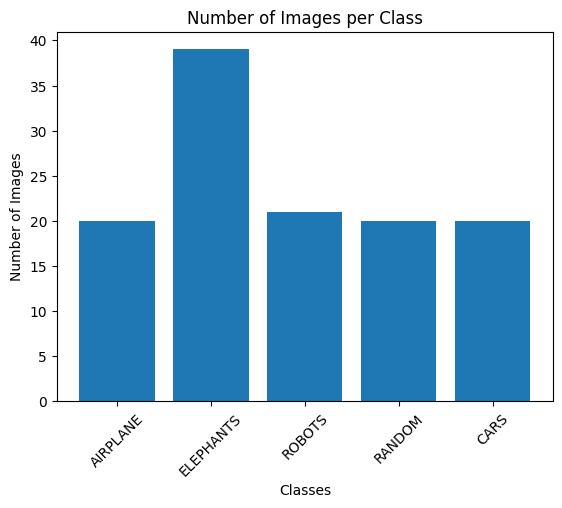

The dataset is balanced.


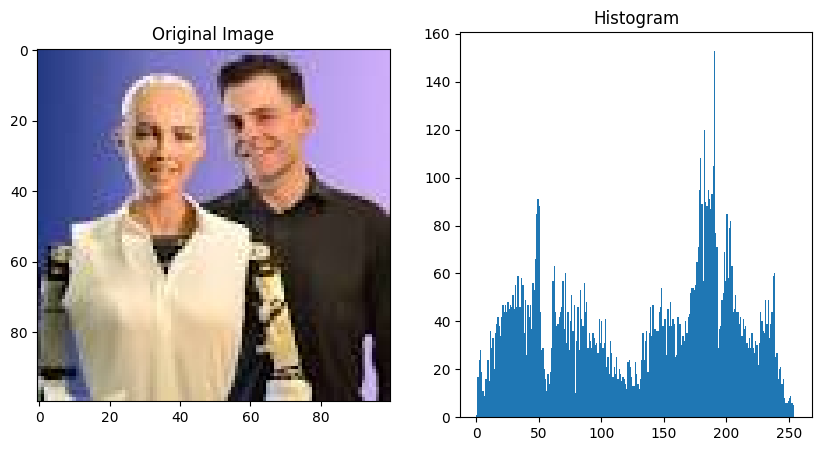

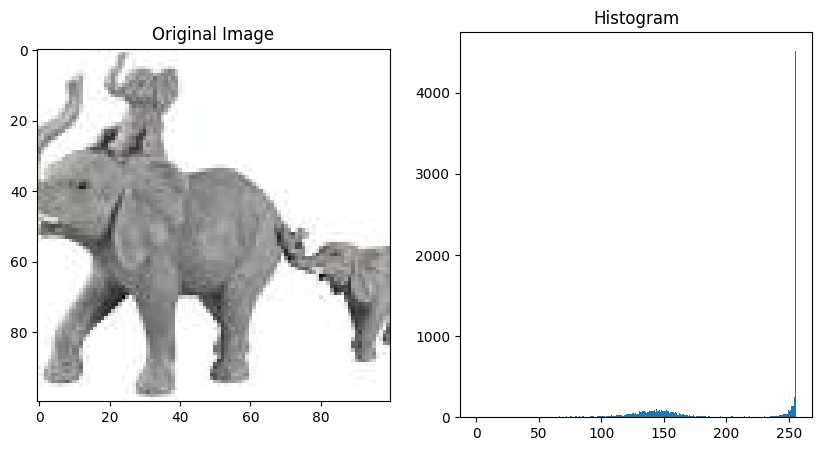

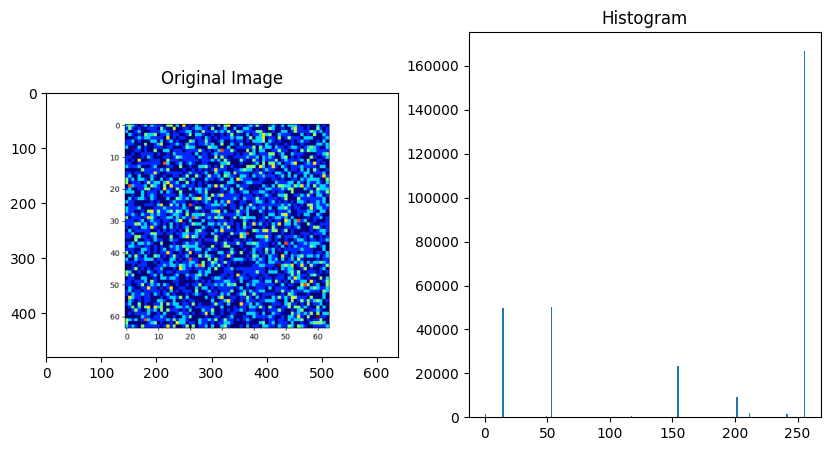

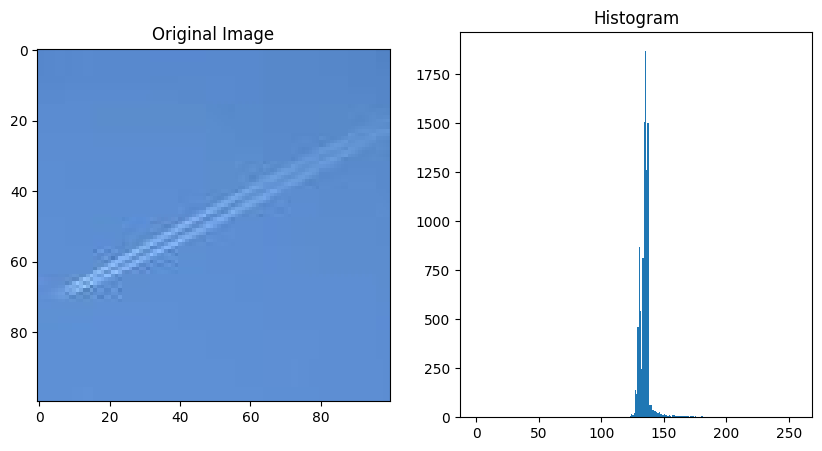

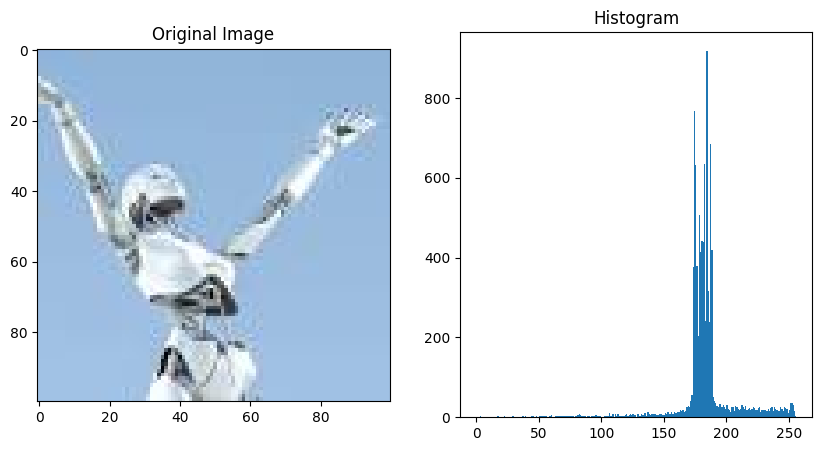

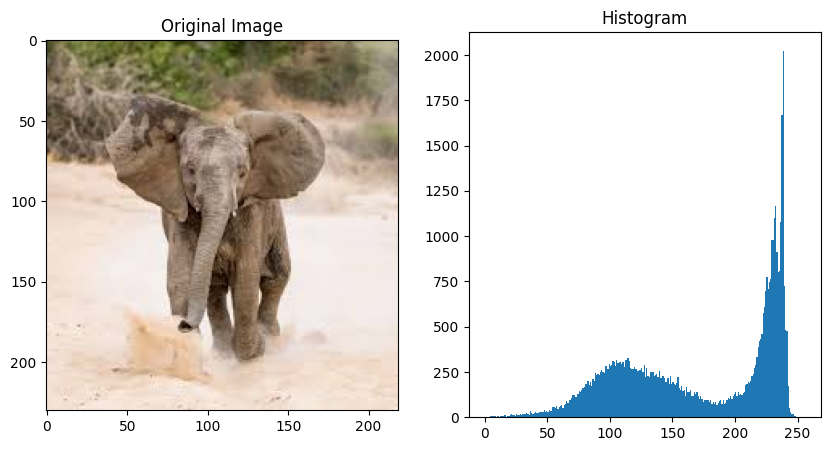

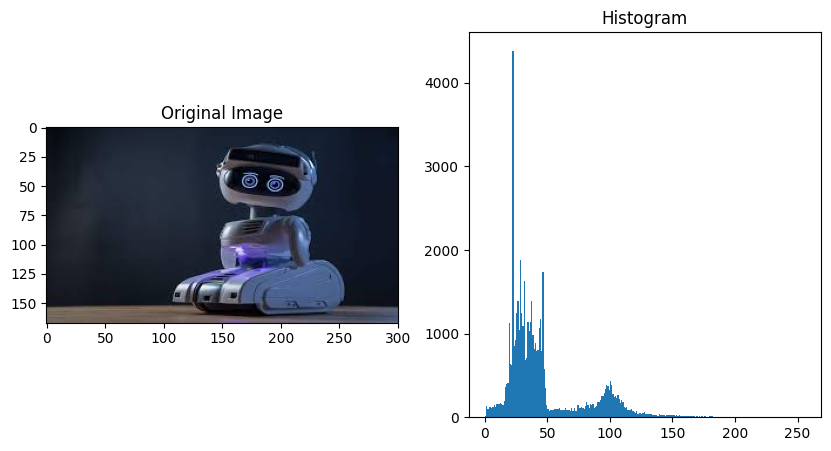

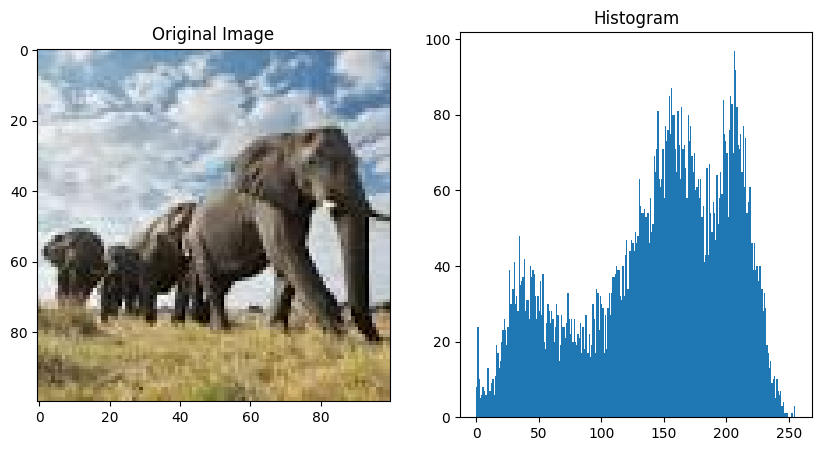

here-----------------------------


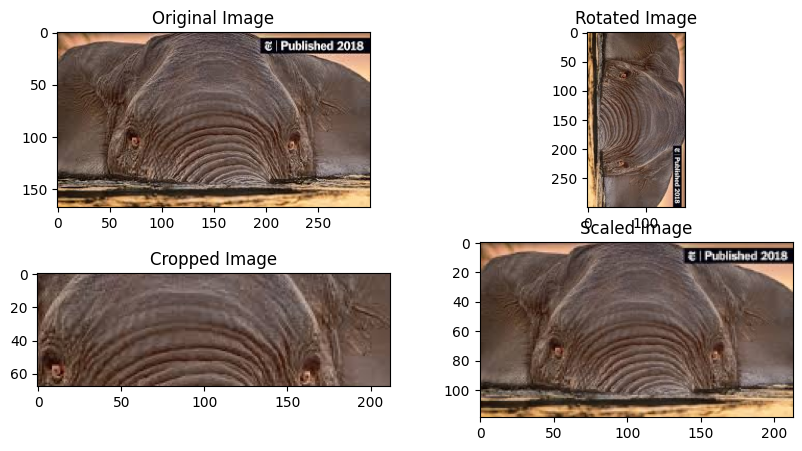

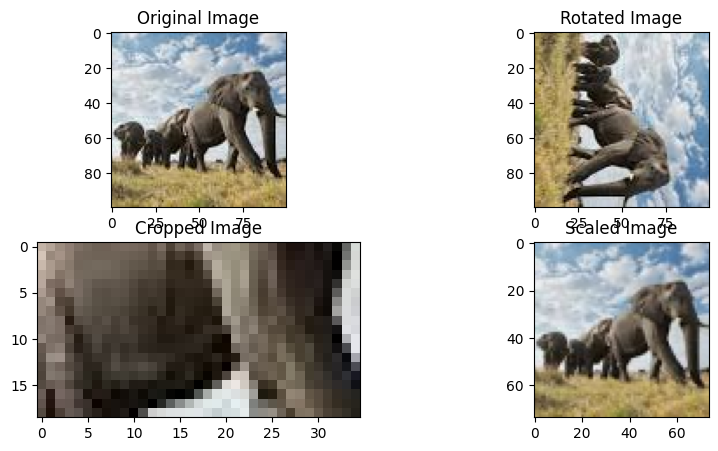

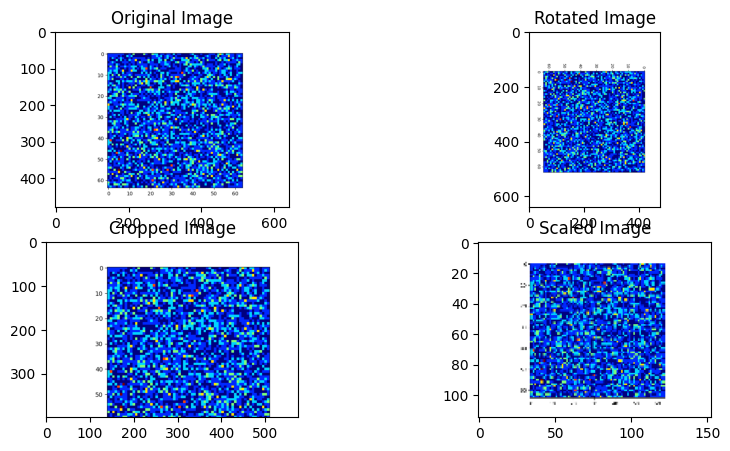

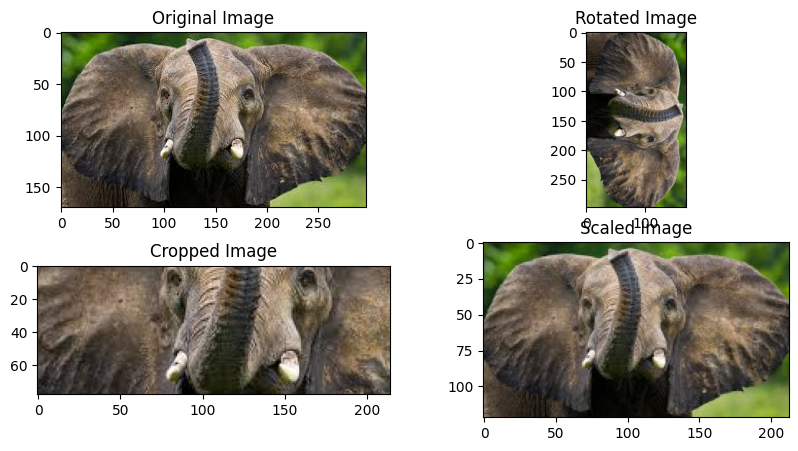

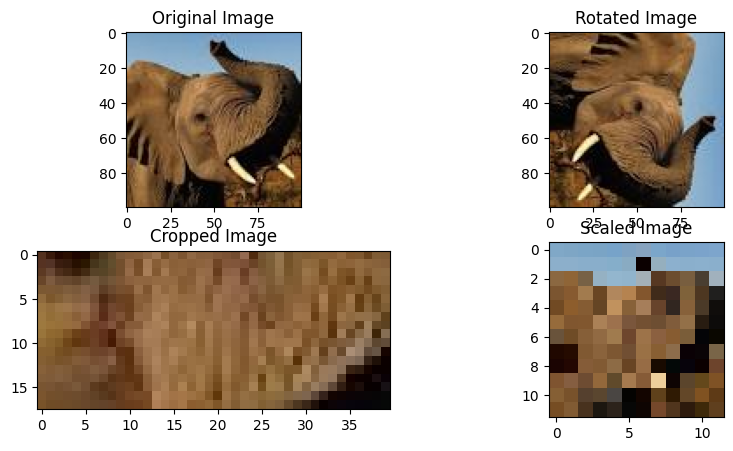

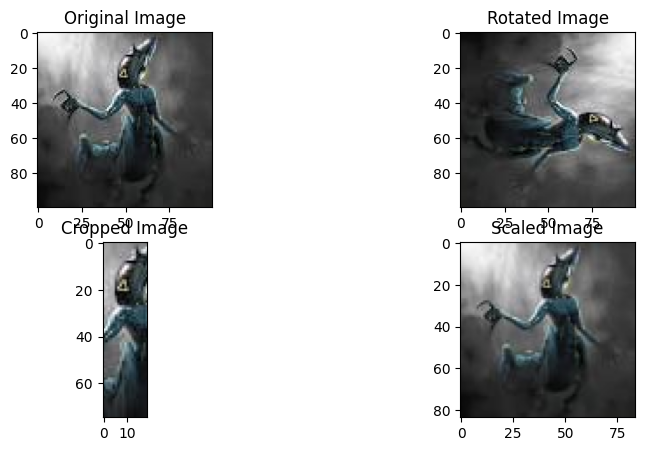

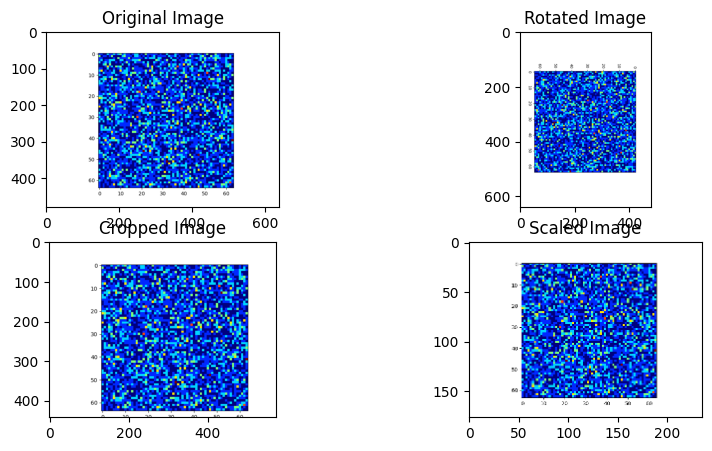

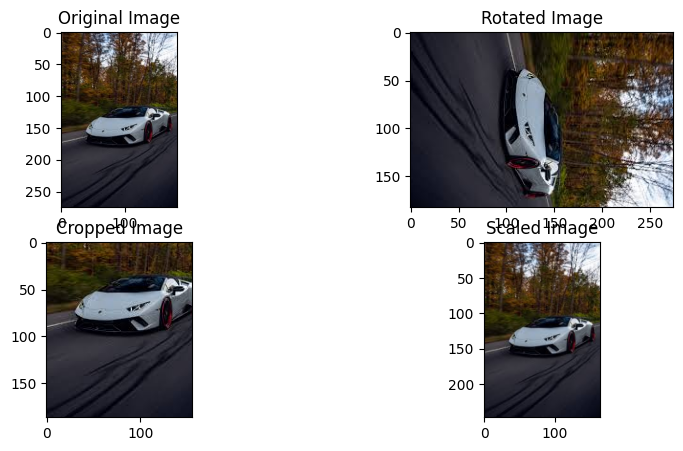

In [7]:

# Driver Code:
dataset_path = 'imgdata/'
check_imbalance(dataset_path)
plot_histograms(dataset_path)
plot_image_transformations(dataset_path)